# Data Analysis

The purpose is to perform some statistical analysis on the data

In [14]:
import os
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm

%matplotlib inline
np.random.seed(1)

**Setup directory**

In [6]:
PROJ_DIR = os.path.dirname(os.getcwd())
TOKENIZED_DIR = os.path.join(PROJ_DIR, 'data', 'tokenized')

**Read the tokenized data** from pickle

In [7]:
with open(TOKENIZED_DIR, 'rb') as f:
    data = pickle.load(f)

We're interested in the **label** (i.e., summary) data

In [9]:
summary = data['labels']

In [15]:
vocab = dict()
sentence_length = dict()

for idx, label in tqdm(enumerate(summary)):
    if len(label) == 0:
        continue
    
    sentence_length[idx] = len(label)
    for token_pair in label:
        token = token_pair[0]
        if token not in vocab.keys():
            vocab[token] = 1
        else:
            vocab[token] += 1

568427it [00:00, 652112.61it/s]


In [39]:
sorted_vocab = {k: v for k, v in sorted(vocab.items(), key=lambda item: item[1], reverse=True) if k not in ['!', ',', '.', '...']}

In [40]:
sample = dict()
count = 0
for k, v in sorted_vocab.items():
    count += 1
    if count > 30:
        break
    sample[k] = v

In [41]:
df = pd.DataFrame(list(sample.items()), columns=['word', 'count'])
df.head(3)

,word,count
0,great,73043
1,the,55555
2,good,51860


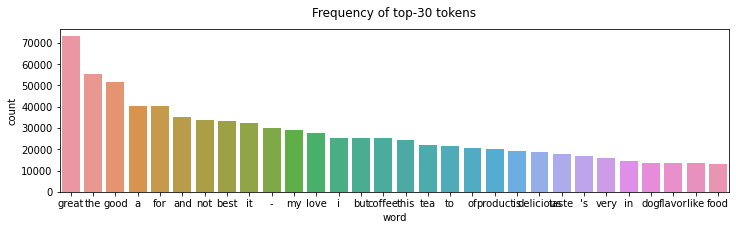

In [42]:
fig, ax = plt.subplots(figsize=(12, 3))
sns.barplot(data=df, x='word', y='count', ax=ax)
plt.title("Frequency of top-30 tokens", pad=12)
fig.savefig('./top30-feq.png', bbox_inches='tight')